# e.g. 12: Compare monthly nino34 time-series from daily inputs from 1 forecast run & assim & ETKF & control & 2 observations

# last edited 17 July 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  n_data_funcs, \
  nino_indices, \
  plot_xy
  
cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf'}

nino_index_k=0

max_ensemble=3
max_ensemble=11

%matplotlib inline

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-32-cdc
END


In [ ]:
print('BEGIN')

import socket
import re
import os
import sys

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir_ncep='/OSM/CBR/OA_DCFP/data/CAFEPP/'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
#===============================================================================

  model='CAFE'
  
  grid_label='gn'
  cafe_calendar='julian'
      
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'

  pval=9 #etkf
  cafe_daily_files_etkf=[]
  for ensemble in range(2,max_ensemble+1):
    cafe_inner_daily_files_etkf=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_etkf=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_20030101-20091231.nc']
    for file in daily_ifils_etkf:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_daily_files_etkf.append(idir+'/'+file)
    cafe_daily_files_etkf.append(cafe_inner_daily_files_etkf)

  print('cafe_daily_files_etkf=',cafe_daily_files_etkf)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================
  
  model='CAFE'
  nino_index_k=0
  
  grid_label='gn'
  cafe_calendar='julian'
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'

  pval=1 #v1_forecast
  cafe_daily_files_v1forc=[]
  for ensemble in range(2,max_ensemble+1):
    cafe_inner_daily_files_v1forc=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
      '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
    daily_ifils_v1forc=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
      grid_label+'_20070101-20121231.nc']
    for file in daily_ifils_v1forc:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_daily_files_v1forc.append(idir+'/'+file)
    cafe_daily_files_v1forc.append(cafe_inner_daily_files_v1forc)

  print('cafe_daily_files_v1forc=',cafe_daily_files_v1forc)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  model='CAFE'
  nino_index_k=0
  
  grid_label='gn'
  cafe_calendar='julian'
    
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Oday'

  ensemble=1
  pval=2 #v1_assim
  cafe_daily_files_assim=[]
  idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval)+'f1/'+table+ \
    '/'+ivar_str_cafe+'/'+grid_label+'/v20171025'
  daily_ifils_assim=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval)+'f1_'+ \
    grid_label+'_20020101-20151231.nc']
  for file in daily_ifils_assim:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      cafe_daily_files_assim.append(idir+'/'+file)
  cafe_daily_files_assim=[cafe_daily_files_assim]

  print('cafe_daily_files_assim=',cafe_daily_files_assim)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  product='NCEPR1'

  ivar_str_ncepr1='skt';ifil_prefix_ncepr1='skt';offset=0.0;scale=1.0;long_name='Surface Temperature';units='degC'

  grid_label='ncep_r1'
  ncepr1_calendar='proleptic_gregorian'

  ncepr1_files=[]
  idir=topdir_ncep+'short/r67/mac599/data/NCEP_R1'
  ifils=[ifil_prefix_ncepr1+'.mon.mean.nc']
  for file in ifils:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      ncepr1_files.append(idir+'/'+file)  
  ncepr1_files=[ncepr1_files]

  print('ncepr1_files=',ncepr1_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  product='HadISST'

  ivar_str_hadisst='tos';ifil_prefix_hadisst='tos';offset=273.15;scale=1.0;long_name='Surface Temperature';units='degC'

  grid_label='hadisst'
  hadisst_calendar='proleptic_gregorian'

  hadisst_files=[]
  idir=topdir_ncep+'g/data/r67/CMIP5/common_restricted/CMIP5/output/Hadley/HadISST/1d/mon/ocean/Omon/r1i1p1/v20170110/tos'
  ifils=[ifil_prefix_hadisst+'_Omon_HadISST_1d_r1i1p1_187001-201512.nc']
  for file in ifils:
    if(not os.path.exists(idir+'/'+file)):
      raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    else:
      hadisst_files.append(idir+'/'+file)  
  hadisst_files=[hadisst_files]

  print('hadisst_files=',hadisst_files)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=1971
  cend=2000
  abeg=1971
  aend=2015

  grid_label='hadisst'
  hadisst_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  hadisst_file_var=n_data_funcs(Diag=False,input_files=hadisst_files,input_var_name=ivar_str_hadisst)

  hadisst_file_var.calculate_filedatetime_info(Diag=False,calendar=hadisst_calendar)

  hadisst_file_var.get_latlon_info(Diag=False)

  hadisst_monthly_nino=hadisst_file_var.calculate_quantity(hadisst_nino_indices,Diag=True,quantity='nino')*scale-offset

  hadisst_nino_monthlyclimatology,hadisst_nino_monthly=hadisst_file_var.monthly_clim_anom( \
    Diag=False,input=hadisst_monthly_nino,AnnOut=False,ZeroClim=True,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)    

  hadisst_nino_monthlyclimatology,hadisst_nino_monthlyanomaly=hadisst_file_var.monthly_clim_anom( \
    Diag=False,input=hadisst_monthly_nino,AnnOut=False,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)
    
  input_datas=(hadisst_nino_monthlyanomaly[:,nino_index_k],)
  input_xvals=(hadisst_file_var.year_fraction_anomaly,)
  
  input_xval=hadisst_file_var.year_fraction_anomaly
  input_datas,input_xvals = (),()
  for n in range(0,4):
    input_datas = input_datas + (hadisst_nino_monthlyanomaly[:,n],)
    input_xvals = input_xvals + (input_xval,)

  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='HadISST', \
    units='$\!^\circ$C', \
    xlab='Year', \
    ylab=hadisst_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(10,5))

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cbeg=1971
  cend=2000
  abeg=1971
  aend=2017

  grid_label='ncep2'
  ncepr1_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  ncepr1_file_var=n_data_funcs(Diag=False,input_files=ncepr1_files,input_var_name=ivar_str_ncepr1)

  ncepr1_file_var.calculate_filedatetime_info(Diag=False,calendar=ncepr1_calendar)

  ncepr1_file_var.get_latlon_info(Diag=False)

  ncepr1_monthly_nino=ncepr1_file_var.calculate_quantity(ncepr1_nino_indices,Diag=True,quantity='nino')

  ncepr1_nino_monthlyclimatology,ncepr1_nino_monthly=ncepr1_file_var.monthly_clim_anom( \
    Diag=False,input=ncepr1_monthly_nino,AnnOut=False,ZeroClim=True,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)  

  ncepr1_nino_monthlyclimatology,ncepr1_nino_monthlyanomaly=ncepr1_file_var.monthly_clim_anom( \
    Diag=False,input=ncepr1_monthly_nino,AnnOut=False,ZeroClim=False,cbeg=cbeg,cend=cend,abeg=abeg,aend=aend)
  
  input_datas=(ncepr1_nino_monthlyanomaly[:,nino_index_k],)
  input_xvals=(ncepr1_file_var.year_fraction_anomaly,)
  
  input_xval=ncepr1_file_var.year_fraction_anomaly
  input_datas,input_xvals = (),()
  for n in range(0,4):
    input_datas = input_datas + (ncepr1_nino_monthlyanomaly[:,n],)
    input_xvals = input_xvals + (input_xval,)

  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='NCEPR1', \
    units='$\!^\circ$C', \
    xlab='Year', \
    ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(10,5))

#===============================================================================

  cbeg=2002
  cend=2015
  abeg=2002
  aend=2015
  
  grid_label='gn'
  
  cafe_assim_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_daily_files_assim=n_data_funcs(input_files=cafe_daily_files_assim,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_assim.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_assim.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_nino_daily_assim=cafe_daily_files_assim.calculate_quantity(cafe_assim_nino_indices, quantity='nino')

  cafe_daily_files_assim.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.
    
  cafe_monthly_nino_from_daily_assim=cafe_daily_files_assim.daily_to_monthly(EndOption=1,input=cafe_nino_daily_assim)
                                                                
  cafe_nino_monthly_climatology_from_daily_assim,cafe_nino_monthly_from_daily_assim=cafe_daily_files_assim.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_assim, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  cafe_nino_monthly_climatology_from_daily_assim,cafe_nino_monthlyanomaly_from_daily_assim=cafe_daily_files_assim.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_assim, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #print('cafe_nino_monthly_anomaly_from_daily_assim.shape=',cafe_nino_monthly_anomaly_from_daily_assim.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
    
  input_datas = (cafe_nino_monthlyanomaly_from_daily_assim[:,nino_index_k],)
  input_xvals = (cafe_daily_files_assim.year_fraction_anomaly,)
  
  plot_xy(Diag=True,input_data=input_datas,input_xvals=input_xvals, \
    title='CAFE Assim', \
    units='$\!^\circ$C', \
    xlab='Year', \
    ylab=cafe_assim_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(10,5))
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

  cbeg=2003
  cend=2009
  abeg=2003
  aend=2009
  
  grid_label='gn'
  
  cafe_etkf_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_daily_files_etkf=n_data_funcs(input_files=cafe_daily_files_etkf,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_etkf.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_etkf.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_nino_daily_etkf=cafe_daily_files_etkf.calculate_quantity(cafe_etkf_nino_indices, quantity='nino')

  cafe_daily_files_etkf.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.
    
  cafe_monthly_nino_from_daily_etkf=cafe_daily_files_etkf.daily_to_monthly(EndOption=1,input=cafe_nino_daily_etkf)
                                                                
  cafe_nino_monthly_climatology_from_daily_etkf,cafe_nino_monthly_from_daily_etkf=cafe_daily_files_etkf.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_etkf, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  cafe_nino_monthly_climatology_from_daily_etkf,cafe_nino_monthlyanomaly_from_daily_etkf=cafe_daily_files_etkf.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_etkf, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #print('cafe_nino_monthly_anomaly_from_daily_etkf.shape=',cafe_nino_monthly_anomaly_from_daily_etkf.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (np.average(cafe_nino_monthlyanomaly_from_daily_etkf[:,:,nino_index_k],axis=1),)
  input_xvals = (cafe_daily_files_etkf.year_fraction_anomaly,)
  
  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='ETKF Fcst', \
    units='$\!^\circ$C', \
    xlab='Year', \
    ylab=cafe_etkf_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(10,5))
             
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================
  
  cbeg=2007
  cend=2012
  abeg=2007
  aend=2012
  
  grid_label='gn'
  
  cafe_v1_nino_indices=nino_indices(Diag=True,grid_label=grid_label,index_selection='ALL')
  
  cafe_daily_files_v1=n_data_funcs(input_files=cafe_daily_files_v1forc,input_var_name=ivar_str_cafe)
  
  cafe_daily_files_v1.calculate_filedatetime_info(calendar=cafe_calendar)
  
  cafe_daily_files_v1.get_latlon_info(Diag=False,lat='latitude',lon='longitude')

  cafe_nino_daily_v1=cafe_daily_files_v1.calculate_quantity(cafe_v1_nino_indices, quantity='nino')

  cafe_daily_files_v1.daily_monthly_indices_info(timesep=1) #would be 1 for daily data and 24 for hourly data.
    
  cafe_monthly_nino_from_daily_v1=cafe_daily_files_v1.daily_to_monthly(EndOption=1,input=cafe_nino_daily_v1)
                                                                
  cafe_nino_monthly_climatology_from_daily_v1,cafe_nino_monthly_from_daily_v1=cafe_daily_files_v1.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_v1, AnnOut=False, ZeroClim=True, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

  cafe_nino_monthly_climatology_from_daily_v1,cafe_nino_monthlyanomaly_from_daily_v1=cafe_daily_files_v1.monthly_clim_anom( \
    Diag=True, input=cafe_monthly_nino_from_daily_v1, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  

  #print('cafe_nino_monthly_anomaly_from_daily_v1.shape=',cafe_nino_monthly_anomaly_from_daily_v1.shape)

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  input_datas = (np.average(cafe_nino_monthlyanomaly_from_daily_v1[:,:,nino_index_k],axis=1),)
  input_xvals = (cafe_daily_files_v1.year_fraction_anomaly,)
  
  plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
    title='CAFE Fcst', \
    units='$\!^\circ$C', \
    xlab='Year', \
    ylab=cafe_v1_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
    zero2=True, \
    reverse_xaxis=False, \
    reverse_yaxis=False, \
    xysize=(10,5))

#===============================================================================

print('Doing some integrity checks...')

if(ncepr1_nino_indices.indices_label==cafe_v1_nino_indices.indices_label==cafe_etkf_nino_indices.indices_label==cafe_assim_nino_indices.indices_label==hadisst_nino_indices.indices_label):
  print('ok')
else:
  raise SystemExit('Issue with nino_indices:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

print('END')

In [ ]:
print('BEGIN')

#   ncep_year_fraction=ncepr1_file_var.year_fraction_anomaly
#   hadisst_year_fraction=hadisst_file_var.year_fraction_anomaly
#   cafe_assim_year_fraction=cafe_daily_files_assim.year_fraction_anomaly
#   cafe_v1_year_fraction=cafe_daily_files_v1.year_fraction_anomaly
#   cafe_etkf_year_fraction=cafe_daily_files_etkf.year_fraction_anomaly

# ncep_date_time_stamp_anomaly = ncepr1_file_var.date_time_stamp_anomaly
# cafe_assim_date_time_stamp_monthly = cafe_daily_files_assim.date_time_stamp_monthly
# cafe_etkf_date_time_stamp_monthly = cafe_daily_files_v1.date_time_stamp_monthly
# cafe_v1_date_time_stamp_monthly = cafe_daily_files_v1.date_time_stamp_monthly

ncepr1_years,ncepr1_months,ncepr1_years_months=[],[],[]
for cnt in range(ncepr1_file_var.date_time_stamp_anomaly.size):
  ncepr1_years.append(ncepr1_file_var.date_time_stamp_anomaly[cnt].year)
  ncepr1_months.append(ncepr1_file_var.date_time_stamp_anomaly[cnt].month)
  ncepr1_years_months.append(ncepr1_file_var.date_time_stamp_anomaly[cnt].year*100+ncepr1_file_var.date_time_stamp_anomaly[cnt].month)

cafe_assim_year1=cafe_daily_files_assim.date_time_stamp_monthly[0].year
cafe_v1_year1=cafe_daily_files_v1.date_time_stamp_monthly[0].year
cafe_etkf_year1=cafe_daily_files_etkf.date_time_stamp_monthly[0].year

cafe_assim_yearN=cafe_daily_files_assim.date_time_stamp_monthly[-1].year
cafe_v1_yearN=cafe_daily_files_v1.date_time_stamp_monthly[-1].year
cafe_etkf_yearN=cafe_daily_files_etkf.date_time_stamp_monthly[-1].year

cafe_assim_month1=cafe_daily_files_assim.date_time_stamp_monthly[0].month
cafe_v1_month1=cafe_daily_files_v1.date_time_stamp_monthly[0].month
cafe_etkf_month1=cafe_daily_files_etkf.date_time_stamp_monthly[0].month

cafe_assim_monthN=cafe_daily_files_assim.date_time_stamp_monthly[-1].month
cafe_v1_monthN=cafe_daily_files_v1.date_time_stamp_monthly[-1].month
cafe_etkf_monthN=cafe_daily_files_etkf.date_time_stamp_monthly[-1].month

ncepr1_year_month1=ncepr1_file_var.date_time_stamp_tfreq[0].year*100+ncepr1_file_var.date_time_stamp_tfreq[0].month
cafe_assim_year_month1=cafe_daily_files_assim.date_time_stamp_monthly[0].year*100+cafe_daily_files_assim.date_time_stamp_monthly[0].month
cafe_v1_year_month1=cafe_daily_files_v1.date_time_stamp_monthly[0].year*100+cafe_daily_files_v1.date_time_stamp_monthly[0].month
cafe_etkf_year_month1=cafe_daily_files_etkf.date_time_stamp_monthly[0].year*100+cafe_daily_files_etkf.date_time_stamp_monthly[0].month

ncepr1_year_monthN=ncepr1_file_var.date_time_stamp_tfreq[-1].year*100+ncepr1_file_var.date_time_stamp_tfreq[-1].month
cafe_assim_year_monthN=cafe_daily_files_assim.date_time_stamp_monthly[-1].year*100+cafe_daily_files_assim.date_time_stamp_monthly[-1].month
cafe_v1_year_monthN=cafe_daily_files_v1.date_time_stamp_monthly[-1].year*100+cafe_daily_files_v1.date_time_stamp_monthly[-1].month
cafe_etkf_year_monthN=cafe_daily_files_etkf.date_time_stamp_monthly[-1].year*100+cafe_daily_files_etkf.date_time_stamp_monthly[-1].month

cafe_assim_first_index=ncepr1_years_months.index(cafe_assim_year_month1)
cafe_assim_last_index=ncepr1_years_months.index(cafe_assim_year_monthN)

cafe_v1_first_index=ncepr1_years_months.index(cafe_v1_year_month1)
cafe_v1_last_index=ncepr1_years_months.index(cafe_v1_year_monthN)

cafe_etkf_first_index=ncepr1_years_months.index(cafe_etkf_year_month1)
cafe_etkf_last_index=ncepr1_years_months.index(cafe_etkf_year_monthN)

#===============================================================================

cafe_v1_bias_data = ma.zeros((cafe_v1_last_index-cafe_v1_first_index+1, cafe_daily_files_v1.nfiles, ncepr1_nino_indices.nindices_nino),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_v1_bias_data[:,enow,:] = cafe_nino_monthly_from_daily_v1[:,enow,:] - ncepr1_nino_monthly[cafe_v1_first_index:cafe_v1_last_index+1,:]
cafe_v1_time_data = ncepr1_file_var.year_fraction_anomaly[cafe_v1_first_index:cafe_v1_last_index+1]

cafe_etkf_bias_data = ma.zeros((cafe_etkf_last_index-cafe_etkf_first_index+1, cafe_daily_files_etkf.nfiles, ncepr1_nino_indices.nindices_nino),\
  dtype='f')
for enow in range(max_ensemble-1):
  print('enow=',enow)
  cafe_etkf_bias_data[:,enow,:] = cafe_nino_monthly_from_daily_etkf[:,enow,:] - ncepr1_nino_monthly[cafe_etkf_first_index:cafe_etkf_last_index+1,:]
cafe_etkf_time_data = ncepr1_file_var.year_fraction_anomaly[cafe_etkf_first_index:cafe_etkf_last_index+1]

cafe_assim_bias_data = cafe_nino_monthly_from_daily_assim - ncepr1_nino_monthly[cafe_assim_first_index:cafe_assim_last_index+1,:]
cafe_assim_time_data = ncepr1_file_var.year_fraction_anomaly[cafe_assim_first_index:cafe_assim_last_index+1]

#===============================================================================

cafe_v1_anomMbias_data = ma.zeros((cafe_v1_last_index-cafe_v1_first_index+1, cafe_daily_files_v1.nfiles, ncepr1_nino_indices.nindices_nino),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_v1_anomMbias_data[:,enow,:] = cafe_nino_monthlyanomaly_from_daily_v1[:,enow,:] - (cafe_nino_monthly_from_daily_v1[:,enow,:] - ncepr1_nino_monthly[cafe_v1_first_index:cafe_v1_last_index+1,:])
  
cafe_etkf_anomMbias_data = ma.zeros((cafe_etkf_last_index-cafe_etkf_first_index+1, cafe_daily_files_etkf.nfiles, ncepr1_nino_indices.nindices_nino),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_etkf_anomMbias_data[:,enow,:] = cafe_nino_monthlyanomaly_from_daily_etkf[:,enow,:] - (cafe_nino_monthly_from_daily_etkf[:,enow,:] - ncepr1_nino_monthly[cafe_etkf_first_index:cafe_etkf_last_index+1,:])
  
cafe_assim_anomMbias_data = cafe_nino_monthlyanomaly_from_daily_assim[:,:] - (cafe_nino_monthly_from_daily_assim[:,:] - ncepr1_nino_monthly[cafe_assim_first_index:cafe_assim_last_index+1,:])

#===============================================================================

input_xvals = (cafe_v1_time_data,)
input_datas = (np.min(cafe_v1_bias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_v1_time_data,)
input_datas = input_datas + (np.max(cafe_v1_bias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.min(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.max(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.average(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_assim_time_data,)
input_datas = input_datas + (cafe_assim_bias_data[:,nino_index_k],)

plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  units=units, \
  xlab='Year', \
  ylab='MthlyBias '+ncepr1_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=[-7,7], \
  fill_between=[0,0,1,1,2,3], \
  xticks=np.arange(1999,2018,2), \
  yticks=np.arange(-7,7,2), \
  legend_position='best', \
  line_colors=['pink','SlateBlue','brown','cyan'], \
  line_alphas=[0.5,0.5,1.0,1.0], \
  line_labels=['Forecast MinMax','EKTF MinMax','ETKF','DataAssim'], \
  legend_item_reorder = [2,1,3,0], \
  legend_fontsize='large' \
  )

#===============================================================================

input_xvals = (cafe_v1_time_data,)
input_datas = (np.min(cafe_v1_anomMbias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_v1_time_data,)
input_datas = input_datas + (np.max(cafe_v1_anomMbias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.min(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.max(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_etkf_time_data,)
input_datas = input_datas + (np.average(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_assim_time_data,)
input_datas = input_datas + (cafe_assim_anomMbias_data[:,nino_index_k],)

plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  units=units, \
  xlab='Year', \
  ylab='MthlyAnom-MthlyBias '+ncepr1_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=[-7,7], \
  fill_between=[0,0,1,1,2,3], \
  xticks=np.arange(1999,2018,2), \
  yticks=np.arange(-7,7,2), \
  legend_position='best', \
  line_colors=['pink','SlateBlue','brown','cyan'], \
  line_alphas=[0.5,0.5,1.0,1.0], \
  line_labels=['Forecast MinMax','EKTF MinMax','ETKF','DataAssim'], \
  legend_item_reorder = [2,1,3,0], \
  legend_fontsize='large' \
  )

#===============================================================================


print('END')

BEGIN
Pkl file exists and keeping...
Pkl read from new or existing...create different output names compared to input...
input_files= None
input_var_name= None
len(dummy_mode)= 5
n_data_funcs.init: Dummy mode...
n_data_funcs.init: Get tuple here...
Diag= False
monthly_clim_anom: All years have 12 months.


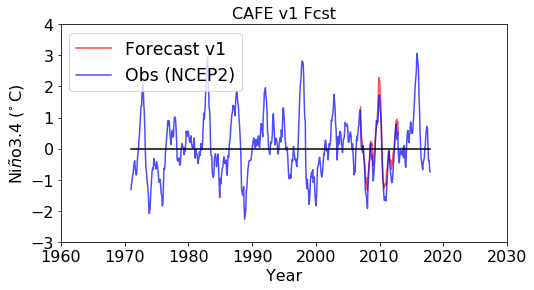

Diag= False
monthly_clim_anom: All years have 12 months.


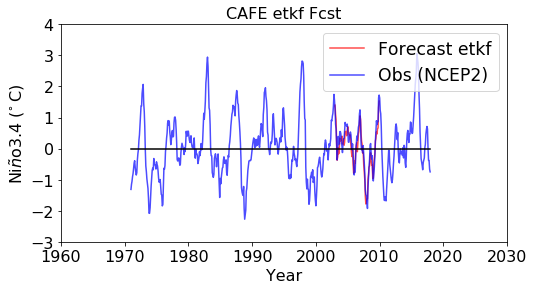

Diag= False
monthly_clim_anom: All years have 12 months.


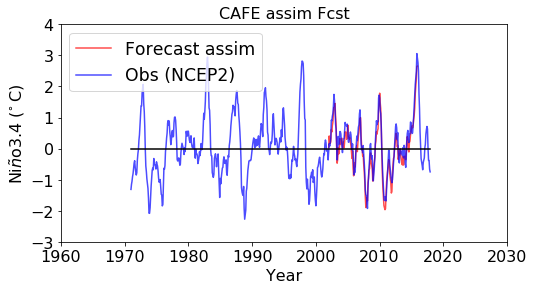

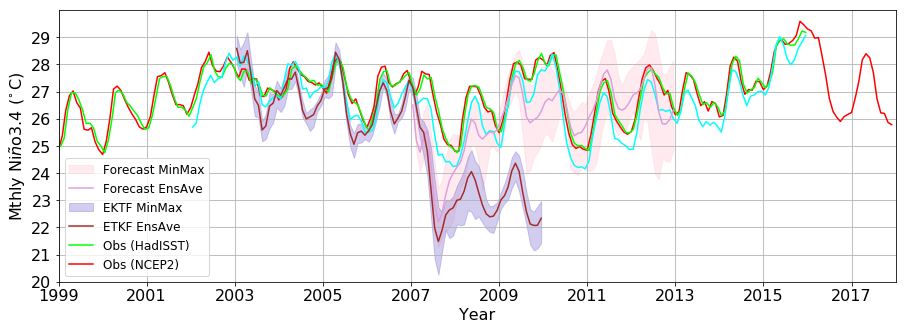

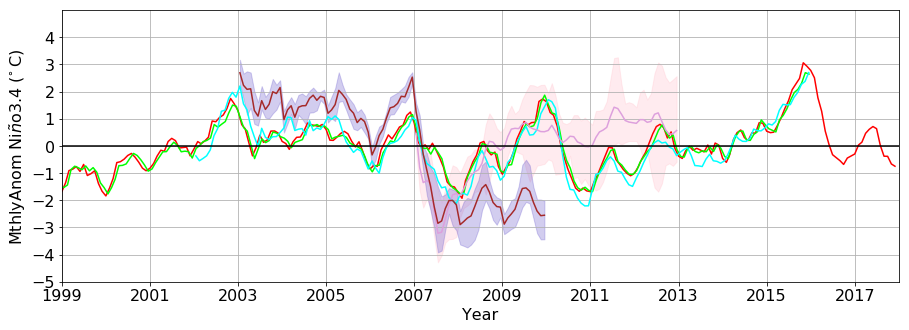

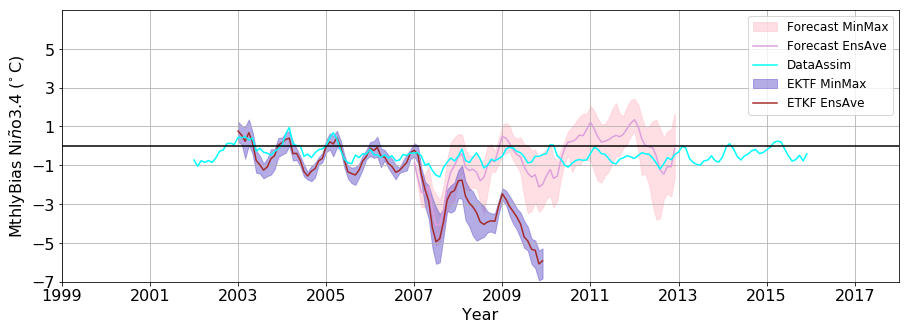

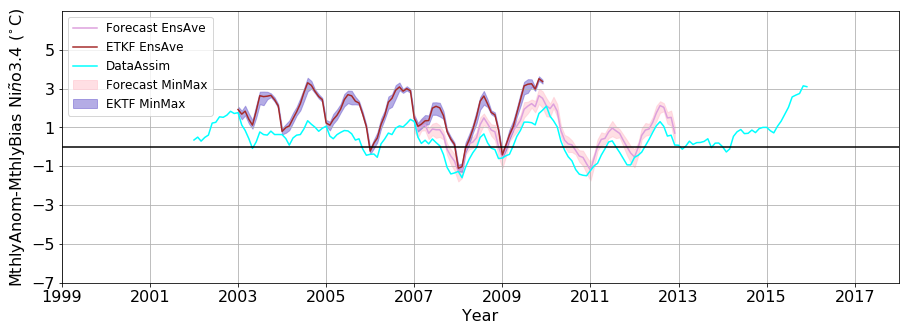

END


In [3]:
print('BEGIN')

Clobber=False
#Clobber=True

output_name='cafe.pkl'
input_name=output_name

if(Clobber):
  
  nino_indice_labels=ncepr1_nino_indices.indices_label
    
  ncepr1_year_fraction=ncepr1_file_var.year_fraction_anomaly
  hadisst_year_fraction=hadisst_file_var.year_fraction_anomaly
  cafe_assim_year_fraction=cafe_daily_files_assim.year_fraction_anomaly
  cafe_v1_year_fraction=cafe_daily_files_v1.year_fraction_anomaly
  cafe_etkf_year_fraction=cafe_daily_files_etkf.year_fraction_anomaly
  
  ncepr1_date_time_stamp_anomaly = ncepr1_file_var.date_time_stamp_anomaly
  hadisst_date_time_stamp_anomaly = hadisst_file_var.date_time_stamp_anomaly
  cafe_assim_date_time_stamp_monthly = cafe_daily_files_assim.date_time_stamp_monthly
  cafe_v1_date_time_stamp_monthly = cafe_daily_files_v1.date_time_stamp_monthly
  cafe_etkf_date_time_stamp_monthly = cafe_daily_files_etkf.date_time_stamp_monthly
  
  ncepr1_nfiles = ncepr1_file_var.nfiles
  hadisst_nfiles = hadisst_file_var.nfiles
  cafe_v1_nfiles = cafe_daily_files_v1.nfiles
  cafe_etkf_nfiles = cafe_daily_files_etkf.nfiles
  cafe_assim_nfiles = cafe_daily_files_assim.nfiles

  ncepr1_nindices_nino = ncepr1_nino_indices.nindices_nino
  hadisst_nindices_nino = hadisst_nino_indices.nindices_nino
  cafe_v1_nindices_nino = cafe_v1_nino_indices.nindices_nino
  cafe_etkf_nindices_nino = cafe_etkf_nino_indices.nindices_nino
  cafe_assim_nindices_nino = cafe_assim_nino_indices.nindices_nino
    
  ncepr1_nindices_label = ncepr1_nino_indices.indices_label
  hadisst_nindices_label = hadisst_nino_indices.indices_label
  cafe_v1_nindices_label = cafe_v1_nino_indices.indices_label
  cafe_etkf_nindices_label = cafe_etkf_nino_indices.indices_label
  cafe_assim_nindices_label = cafe_assim_nino_indices.indices_label

  ncepr1_date_time_stamp_tfreq=ncepr1_file_var.date_time_stamp_tfreq #original monthly inputs
  hadiist_date_time_stamp_tfreq=hadisst_file_var.date_time_stamp_tfreq #original monthly inputs
  cafe_v1_num_stamp_monthly=cafe_daily_files_v1.num_stamp_monthly #original daily inputs
  cafe_etkf_num_stamp_monthly=cafe_daily_files_etkf.num_stamp_monthly #original daily inputs
  cafe_assim_num_stamp_monthly=cafe_daily_files_assim.num_stamp_monthly #original daily inputs
  
  ncepr1_time_tfreq_units=ncepr1_file_var.time_tfreq_units #check this is the one to keep...
  hadisst_time_tfreq_units=hadisst_file_var.time_tfreq_units #check this is the one to keep...
  cafe_v1_time_tfreq_units=cafe_daily_files_v1.time_tfreq_units  
  cafe_etkf_time_tfreq_units=cafe_daily_files_etkf.time_tfreq_units    
  cafe_assim_time_tfreq_units=cafe_daily_files_assim.time_tfreq_units  

  ncepr1_time_tfreq_calendar=ncepr1_file_var.time_tfreq_calendar
  hadisst_time_tfreq_calendar=hadisst_file_var.time_tfreq_calendar  
  cafe_v1_time_tfreq_calendar=cafe_daily_files_v1.time_tfreq_calendar  
  cafe_etkf_time_tfreq_calendar=cafe_daily_files_etkf.time_tfreq_calendar    
  cafe_assim_time_tfreq_calendar=cafe_daily_files_assim.time_tfreq_calendar  
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  pkl_objects=( \
    nino_indice_labels, \
    \
    ncepr1_nino_monthly, \
    hadisst_nino_monthly, \
    cafe_nino_monthly_from_daily_v1, \
    cafe_nino_monthly_from_daily_etkf, \
    cafe_nino_monthly_from_daily_assim, \
    \
    ncepr1_nino_monthlyanomaly, \
    hadisst_nino_monthlyanomaly, \
    cafe_nino_monthlyanomaly_from_daily_v1, \
    cafe_nino_monthlyanomaly_from_daily_etkf, \
    cafe_nino_monthlyanomaly_from_daily_assim, \
    \
    ncepr1_year_fraction, \
    hadisst_year_fraction, \
    cafe_v1_year_fraction, \
    cafe_etkf_year_fraction, \
    cafe_assim_year_fraction, \
    \
    ncepr1_date_time_stamp_anomaly, \
    hadisst_date_time_stamp_anomaly, \
    cafe_v1_date_time_stamp_monthly, \
    cafe_etkf_date_time_stamp_monthly, \
    cafe_assim_date_time_stamp_monthly, \
    \
    ncepr1_nfiles, \
    hadisst_nfiles, \
    cafe_v1_nfiles, \
    cafe_etkf_nfiles, \
    cafe_assim_nfiles, \
    \
    ncepr1_nindices_nino, \
    hadisst_nindices_nino, \
    cafe_v1_nindices_nino, \
    cafe_etkf_nindices_nino, \
    cafe_assim_nindices_nino, \
    \
    ncepr1_nindices_label, \
    hadisst_nindices_label, \
    cafe_v1_nindices_label, \
    cafe_etkf_nindices_label, \
    cafe_assim_nindices_label, \
    \
    ncepr1_date_time_stamp_tfreq, \
    hadiist_date_time_stamp_tfreq, \
    cafe_v1_num_stamp_monthly, \
    cafe_etkf_num_stamp_monthly, \
    cafe_assim_num_stamp_monthly, \
    \
    ncepr1_time_tfreq_units, \
    hadisst_time_tfreq_units, \
    cafe_v1_time_tfreq_units, \
    cafe_etkf_time_tfreq_units, \
    cafe_assim_time_tfreq_units, \
    \
    ncepr1_time_tfreq_calendar, \
    hadisst_time_tfreq_calendar, \
    cafe_v1_time_tfreq_calendar, \
    cafe_etkf_time_tfreq_calendar, \
    cafe_assim_time_tfreq_calendar \
    )

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  print('len(pkl_objects)=',len(pkl_objects))

if(os.path.exists(output_name) and Clobber):
  print('Pkl file exists and deleting...')
  os.remove(output_name)

  pickling_out = open(output_name, "wb")
  pickle.dump( pkl_objects, pickling_out)
  pickling_out.close()

if(os.path.exists(output_name) and not Clobber):
  print('Pkl file exists and keeping...')
    
print('Pkl read from new or existing...create different output names compared to input...')
if(os.path.exists(output_name)):
  pickling_in = open(input_name, "rb")
  nino_indice_labels, \
    ncepr1_mondata, hadisst_mondata, cafe_v1_mondata, cafe_etkf_mondata, cafe_assim_mondata, \
    ncepr1_anomdata, hadisst_anomdata, cafe_v1_anomdata, cafe_etkf_anomdata, cafe_assim_anomdata, \
    ncepr1_time, hadisst_time, cafe_v1_time, cafe_etkf_time, cafe_assim_time, \
    ncepr1_stamp, hadisst_stamp, cafe_v1_stamp, cafe_etkf_stamp, cafe_assim_stamp, \
    ncepr1_nfil, hadiist_nfil, cafe_v1_nfil, cafe_etkf_nfil, cafe_assim_nfil, \
    ncepr1_nind, hadiist_nind, cafe_v1_nind, cafe_etkf_nind, cafe_assim_nind, \
    ncepr1_labs, hadiist_labs, cafe_v1_labs, cafe_etkf_labs, cafe_assim_labs, \
    ncepr1_stamp_tfreq, hadiist_stamp_tfreq, cafe_v1_num_stamp, cafe_etkf_num_stamp, cafe_assim_num_stamp, \
    ncepr1_time_units, hadisst_time_units, cafe_v1_time_units, cafe_etkf_time_units, cafe_assim_time_units, \
    ncepr1_time_calendar, hadisst_time_calendar, cafe_v1_time_calendar, cafe_etkf_time_calendar, cafe_assim_time_calendar \
    = pickle.load(pickling_in)
  pickling_in.close()

ncepr1_years_months=[]
for cnt in range(ncepr1_stamp.size):
  ncepr1_years_months.append(ncepr1_stamp[cnt].year*100+ncepr1_stamp[cnt].month)
  
cafe_assim_year1=cafe_assim_stamp[0].year
cafe_v1_year1=cafe_v1_stamp[0].year
cafe_etkf_year1=cafe_etkf_stamp[0].year

cafe_assim_yearN=cafe_assim_stamp[-1].year
cafe_v1_yearN=cafe_v1_stamp[-1].year
cafe_etkf_yearN=cafe_etkf_stamp[-1].year

cafe_assim_month1=cafe_assim_stamp[0].month
cafe_v1_month1=cafe_v1_stamp[0].month
cafe_etkf_month1=cafe_etkf_stamp[0].month

cafe_assim_monthN=cafe_assim_stamp[-1].month
cafe_v1_monthN=cafe_v1_stamp[-1].month
cafe_etkf_monthN=cafe_etkf_stamp[-1].month

cafe_assim_year_month1=cafe_assim_stamp[0].year*100+cafe_assim_stamp[0].month
cafe_v1_year_month1=cafe_v1_stamp[0].year*100+cafe_v1_stamp[0].month
cafe_etkf_year_month1=cafe_etkf_stamp[0].year*100+cafe_etkf_stamp[0].month

cafe_assim_year_monthN=cafe_assim_stamp[-1].year*100+cafe_assim_stamp[-1].month
cafe_v1_year_monthN=cafe_v1_stamp[-1].year*100+cafe_v1_stamp[-1].month
cafe_etkf_year_monthN=cafe_etkf_stamp[-1].year*100+cafe_etkf_stamp[-1].month

cafe_assim_first_index=ncepr1_years_months.index(cafe_assim_year_month1)
cafe_assim_last_index=ncepr1_years_months.index(cafe_assim_year_monthN)

cafe_v1_first_index=ncepr1_years_months.index(cafe_v1_year_month1)
cafe_v1_last_index=ncepr1_years_months.index(cafe_v1_year_monthN)

cafe_etkf_first_index=ncepr1_years_months.index(cafe_etkf_year_month1)
cafe_etkf_last_index=ncepr1_years_months.index(cafe_etkf_year_monthN)

#===============================================================================

cafe_v1_bias_data = ma.zeros((cafe_v1_last_index-cafe_v1_first_index+1, cafe_v1_nfil, cafe_v1_nind),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_v1_bias_data[:,enow,:] = cafe_v1_mondata[:,enow,:] - ncepr1_mondata[cafe_v1_first_index:cafe_v1_last_index+1,:]
cafe_v1_time_data = ncepr1_time[cafe_v1_first_index:cafe_v1_last_index+1]
cafe_etkf_bias_data = ma.zeros((cafe_etkf_last_index-cafe_etkf_first_index+1, cafe_etkf_nfil, cafe_etkf_nind),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_etkf_bias_data[:,enow,:] = cafe_etkf_mondata[:,enow,:] - ncepr1_mondata[cafe_etkf_first_index:cafe_etkf_last_index+1,:]
cafe_etkf_time_data = ncepr1_time[cafe_etkf_first_index:cafe_etkf_last_index+1]
cafe_assim_bias_data = cafe_assim_mondata - ncepr1_mondata[cafe_assim_first_index:cafe_assim_last_index+1,:]
cafe_assim_time_data = ncepr1_time[cafe_assim_first_index:cafe_assim_last_index+1]

#===============================================================================

cafe_v1_anomMbias_data = ma.zeros((cafe_v1_last_index-cafe_v1_first_index+1, cafe_v1_nfil, cafe_v1_nind),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_v1_anomMbias_data[:,enow,:] = cafe_v1_anomdata[:,enow,:] - (cafe_v1_mondata[:,enow,:] - ncepr1_mondata[cafe_v1_first_index:cafe_v1_last_index+1,:])
cafe_etkf_anomMbias_data = ma.zeros((cafe_etkf_last_index-cafe_etkf_first_index+1, cafe_etkf_nfil, cafe_etkf_nind),\
  dtype='f')
for enow in range(max_ensemble-1):
  cafe_etkf_anomMbias_data[:,enow,:] = cafe_etkf_anomdata[:,enow,:] - (cafe_etkf_mondata[:,enow,:] - ncepr1_mondata[cafe_etkf_first_index:cafe_etkf_last_index+1,:])
cafe_assim_anomMbias_data = cafe_assim_anomdata[:,:] - (cafe_assim_mondata[:,:] - ncepr1_mondata[cafe_assim_first_index:cafe_assim_last_index+1,:])

#===============================================================================

cafe_v1_adjusted = cafe_v1_mondata - cafe_v1_bias_data
cafe_etkf_adjusted = cafe_etkf_mondata - cafe_etkf_bias_data
cafe_assim_adjusted = cafe_assim_mondata - cafe_assim_bias_data

#===============================================================================

#This was old way of calculating anomalies, but I have modified n_data_funcs to have a 'dummy_mode'. This tricks it to doing monthly_clim_anom functionality by providing minimum of self.data objects.

# cbeg=2007
# cend=2012
# abeg=2007
# aend=2012

# cafe_nino_monthly_climatology_from_daily_v1_adjusted,cafe_nino_monthlyanomaly_from_daily_v1_adjusted=cafe_daily_files_v1.monthly_clim_anom( \
#     Diag=True, input=cafe_v1_adjusted, AnnOut=False, ZeroClim=False, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)


# cbeg=2003
# cend=2009
# abeg=2003
# aend=2009
  
# cafe_nino_monthly_climatology_from_daily_etkf_adjusted,cafe_nino_monthlyanomaly_from_daily_etkf_adjusted=cafe_daily_files_etkf.monthly_clim_anom( \
#     Diag=True, input=cafe_etkf_adjusted, AnnOut=False, ZeroClim=False, \
#     cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

# input_datas=(ncepr1_nino_monthlyanomaly[:,nino_index_k],)
# input_xvals=(ncepr1_year_fraction,)

# input_datas = input_datas + (np.average(cafe_nino_monthlyanomaly_from_daily_v1_adjusted[:,:,nino_index_k],axis=1),)
# input_xvals = input_xvals + (cafe_v1_time_data,)

# input_datas = input_datas + (np.average(cafe_nino_monthlyanomaly_from_daily_etkf_adjusted[:,:,nino_index_k],axis=1),)
# input_xvals = input_xvals + (cafe_etkf_time_data,)

# plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
#   title='CAFE Fcst', \
#   units='$\!^\circ$C', \
#   xlab='Year', \
#   ylab=cafe_etkf_nino_indices.indices_label[nino_index_k]+' ('+'$\!^\circ$C'+')', \
#   zero2=True, \
#   reverse_xaxis=False, \
#   reverse_yaxis=False, \
#   line_colors=['red','blue','green'], \
#   line_labels=['Obs (NCEP2)','Forecast','ETKF'], \
#   legend_position='best', \
#   xysize=(10,5))

#===============================================================================

#The new approach:

cbeg=2007
cend=2012
abeg=2007
aend=2012

test_v1 = n_data_funcs(Diag=True, input_files=None, input_var_name=None, dummy_mode=(True, cafe_v1_stamp, cafe_v1_num_stamp, cafe_v1_time_units, cafe_v1_time_calendar))

cafe_nino_monthly_climatology_from_daily_v1_adjusted_test,cafe_nino_monthlyanomaly_from_daily_v1_adjusted_test=test_v1.monthly_clim_anom( \
    Diag=False, input=cafe_v1_adjusted, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

input_xvals = (cafe_v1_time_data,)
input_datas = (np.average(cafe_nino_monthlyanomaly_from_daily_v1_adjusted_test[:,:,nino_index_k],axis=1),)

input_datas = input_datas + (ncepr1_anomdata[:,nino_index_k],)
input_xvals = input_xvals + (ncepr1_time,)

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE v1 Fcst', \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab=cafe_v1_labs[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue'], \
  line_labels=['Forecast v1','Obs (NCEP2)'], \
  legend_position='best', \
  xysize=(8,4))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cbeg=2003
cend=2009
abeg=2003
aend=2009

test_etkf = n_data_funcs(Diag=False, input_files=None, input_var_name=None, dummy_mode=(True, cafe_etkf_stamp, cafe_etkf_num_stamp, cafe_etkf_time_units, cafe_etkf_time_calendar))

cafe_nino_monthly_climatology_from_daily_etkf_adjusted_test, cafe_nino_monthlyanomaly_from_daily_etkf_adjusted_test=test_etkf.monthly_clim_anom( \
    Diag=False, input=cafe_etkf_adjusted, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

input_xvals = (cafe_etkf_time_data,)
input_datas = (np.average(cafe_nino_monthlyanomaly_from_daily_etkf_adjusted_test[:,:,nino_index_k],axis=1),)

input_datas = input_datas + (ncepr1_anomdata[:,nino_index_k],)
input_xvals = input_xvals + (ncepr1_time,)

plot_xy(Diag=False,input_data=input_datas,input_xvals=input_xvals, \
  title='CAFE etkf Fcst', \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab=cafe_etkf_labs[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue'], \
  line_labels=['Forecast etkf','Obs (NCEP2)'], \
  legend_position='best', \
  xysize=(8,4))

cbeg=2002
cend=2015
abeg=2002
aend=2015

test_assim = n_data_funcs(Diag=False,input_files=None, input_var_name=None, dummy_mode=(True, cafe_assim_stamp, cafe_assim_num_stamp, cafe_assim_time_units, cafe_assim_time_calendar))

cafe_nino_monthly_climatology_from_daily_assim_adjusted_test, cafe_nino_monthlyanomaly_from_daily_assim_adjusted_test=test_assim.monthly_clim_anom( \
    Diag=False, input=cafe_assim_adjusted, AnnOut=False, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)

input_xvals = (cafe_assim_time_data,)
input_datas = (cafe_nino_monthlyanomaly_from_daily_assim_adjusted_test[:,nino_index_k],)

input_datas = input_datas + (ncepr1_anomdata[:,nino_index_k],)
input_xvals = input_xvals + (ncepr1_time,)

plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
  title='CAFE assim Fcst', \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab=cafe_assim_labs[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  line_colors=['red','blue'], \
  line_labels=['Forecast assim','Obs (NCEP2)'], \
  legend_position='best', \
  xysize=(8,4))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#===============================================================================

# print('len(nino_indice_labels)=',len(nino_indice_labels))

# print('ncepr1_mondata.shape=',ncepr1_mondata.shape)
# print('hadisst_mondata.shape=',hadisst_mondata.shape)
# print('cafe_assim_mondata.shape=',cafe_assim_mondata.shape)
# print('cafe_v1_mondata.shape=',cafe_v1_mondata.shape)
# print('cafe_etkf_mondata.shape=',cafe_etkf_mondata.shape)

# print('ncepr1_anomdata.shape=',ncepr1_anomdata.shape)
# print('hadisst_anomdata.shape=',hadisst_anomdata.shape)
# print('cafe_assim_anomdata.shape=',cafe_assim_anomdata.shape)
# print('cafe_v1_anomdata.shape=',cafe_v1_anomdata.shape)
# print('cafe_etkf_anomdata.shape=',cafe_etkf_anomdata.shape)

# print('ncepr1_time.shape=',ncepr1_time.shape)
# print('hadisst_time.shape=',hadisst_time.shape)
# print('cafe_assim_time.shape=',cafe_assim_time.shape)
# print('cafe_v1_time.shape=',cafe_v1_time.shape)
# print('cafe_etkf_time.shape=',cafe_etkf_time.shape)

#===============================================================================

input_xvals = (ncepr1_time,)
input_xvals = input_xvals + (hadisst_time,)
input_xvals = input_xvals + (cafe_assim_time,)
input_xvals = input_xvals + (cafe_v1_time,)
input_xvals = input_xvals + (cafe_v1_time,)
input_xvals = input_xvals + (cafe_v1_time,)
input_xvals = input_xvals + (cafe_etkf_time,)
input_xvals = input_xvals + (cafe_etkf_time,)
input_xvals = input_xvals + (cafe_etkf_time,)

input_anomdatas = (ncepr1_anomdata[:,nino_index_k],)
input_anomdatas = input_anomdatas + (hadisst_anomdata[:,nino_index_k],)
input_anomdatas = input_anomdatas + (cafe_assim_anomdata[:,nino_index_k],)
input_anomdatas = input_anomdatas + (np.min(cafe_v1_anomdata[:,:,nino_index_k],axis=1),)
input_anomdatas = input_anomdatas + (np.max(cafe_v1_anomdata[:,:,nino_index_k],axis=1),)
input_anomdatas = input_anomdatas + (np.average(cafe_v1_anomdata[:,:,nino_index_k],axis=1),)
input_anomdatas = input_anomdatas + (np.min(cafe_etkf_anomdata[:,:,nino_index_k],axis=1),)
input_anomdatas = input_anomdatas + (np.max(cafe_etkf_anomdata[:,:,nino_index_k],axis=1),)
input_anomdatas = input_anomdatas + (np.average(cafe_etkf_anomdata[:,:,nino_index_k],axis=1),)

input_mondatas = (ncepr1_mondata[:,nino_index_k],)
input_mondatas = input_mondatas + (hadisst_mondata[:,nino_index_k],)
input_mondatas = input_mondatas + (cafe_assim_mondata[:,nino_index_k],)
input_mondatas = input_mondatas + (np.min(cafe_v1_mondata[:,:,nino_index_k],axis=1),)
input_mondatas = input_mondatas + (np.max(cafe_v1_mondata[:,:,nino_index_k],axis=1),)
input_mondatas = input_mondatas + (np.average(cafe_v1_mondata[:,:,nino_index_k],axis=1),)
input_mondatas = input_mondatas + (np.min(cafe_etkf_mondata[:,:,nino_index_k],axis=1),)
input_mondatas = input_mondatas + (np.max(cafe_etkf_mondata[:,:,nino_index_k],axis=1),)
input_mondatas = input_mondatas + (np.average(cafe_etkf_mondata[:,:,nino_index_k],axis=1),)

#monthly full
ylim=[20,30]
yticks=np.arange(20,30,1)

plot_xy(Diag=False, \
  input_data=input_mondatas, \
  input_xvals=input_xvals, \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab='Mthly '+ncepr1_labs[nino_index_k]+' ($\!^\circ$C)', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=ylim, \
  fill_between=[0,1,2,3,3,4,5,5,6], \
  xticks=np.arange(1999,2018,2), \
  yticks=yticks, \
  legend_position='lower left', \
  line_colors=['red','lime','cyan','pink','plum','SlateBlue','brown'], \
  line_alphas=[1.0,1.0,1.0,0.3,1.0,0.3,1.0], \
  line_labels=['Obs (NCEP2)','Obs (HadISST)','DataAssim.','Forecast MinMax','Forecast EnsAve','EKTF MinMax','ETKF EnsAve'], \
  legend_item_reorder = [5,3,6,4,1,0], \
  legend_fontsize='large' \
  )

#===============================================================================

#monthly anomalies
ylim=[-5,5]
yticks=np.arange(-5,5,1)

plot_xy(Diag=False, \
  input_data=input_anomdatas, \
  input_xvals=input_xvals, \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab='MthlyAnom '+ncepr1_labs[nino_index_k]+' ($\!^\circ$C)', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=ylim, \
  fill_between=[0,1,2,3,3,4,5,5,6], \
  xticks=np.arange(1999,2018,2), \
  yticks=yticks, \
  legend_position='lower center', \
  line_colors=['red','lime','cyan','pink','plum','SlateBlue','brown'], \
  line_alphas=[1.0,1.0,1.0,0.3,1.0,0.3,1.0], \
  line_labels=['Obs (NCEP2)','Obs (HadISST)','DataAssim.','Forecast MinMax','Forecast EnsAve','EKTF MinMax','ETKF'], \
  legend_fontsize='large', \
  legend_item_reorder = [0,1,2,3,4,5,6], \
  legend_off=True \
  )

#===============================================================================

input_xvals = (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_assim_time_data,)

input_datas = (np.min(cafe_v1_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.max(cafe_v1_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.average(cafe_v1_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.min(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.max(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.average(cafe_etkf_bias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (cafe_assim_bias_data[:,nino_index_k],)

plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab='MthlyBias '+ncepr1_labs[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=[-7,7], \
  fill_between=[0,0,1,2,2,3,4], \
  xticks=np.arange(1999,2018,2), \
  yticks=np.arange(-7,7,2), \
  legend_position='best', \
  line_colors=['pink','plum','SlateBlue','brown','cyan'], \
  line_alphas=[0.5,1.0,0.5,1.0,1.0], \
  line_labels=['Forecast MinMax','Forecast EnsAve','EKTF MinMax','ETKF EnsAve','DataAssim'], \
  legend_item_reorder = [3,0,2,4,1], \
  legend_fontsize='large' \
  )

#===============================================================================

input_xvals = (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_v1_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_etkf_time_data,)
input_xvals = input_xvals + (cafe_assim_time_data,)

input_datas = (np.min(cafe_v1_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.max(cafe_v1_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.average(cafe_v1_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.min(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.max(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (np.average(cafe_etkf_anomMbias_data[:,:,nino_index_k],axis=1),)
input_datas = input_datas + (cafe_assim_anomMbias_data[:,nino_index_k],)

plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  units='$\!^\circ$C', \
  xlab='Year', \
  ylab='MthlyAnom-MthlyBias '+ncepr1_labs[nino_index_k]+' ('+'$\!^\circ$C'+')', \
  zero2=True, \
  grid=True, \
  xysize=(15,5), \
  xlim=[1999,2018], \
  ylim=[-7,7], \
  fill_between=[0,0,1,2,2,3,4], \
  xticks=np.arange(1999,2018,2), \
  yticks=np.arange(-7,7,2), \
  legend_position='best', \
  line_colors=['pink','plum','SlateBlue','brown','cyan'], \
  line_alphas=[0.5,1.0,0.5,1.0,1.0], \
  line_labels=['Forecast MinMax','Forecast EnsAve','EKTF MinMax','ETKF EnsAve','DataAssim'], \
  legend_item_reorder = [0,1,2,3,4], \
  legend_fontsize='large' \
  )

#===============================================================================

print('END')

In [ ]:
input_xvals = (ncepr1_file_var.year_fraction_anomaly,)
input_datas = (ncepr1_nino_monthlyanomaly[:,nino_index_k],)

input_xvals = input_xvals + (hadisst_file_var.year_fraction_anomaly,)
input_datas = input_datas + (hadisst_nino_monthlyanomaly[:,nino_index_k],)

input_xvals = input_xvals + (cafe_daily_files_assim.year_fraction_anomaly,)
input_datas = input_datas + (cafe_nino_monthlyanomaly_from_daily_assim[:,nino_index_k],)
  
input_xvals = input_xvals + (cafe_daily_files_v1.year_fraction_anomaly,)
input_datas = input_datas + (np.min(cafe_nino_monthlyanomaly_from_daily_v1[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_daily_files_v1.year_fraction_anomaly,)
input_datas = input_datas + (np.max(cafe_nino_monthlyanomaly_from_daily_v1[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_daily_files_etkf.year_fraction_anomaly,)
input_datas = input_datas + (np.min(cafe_nino_monthlyanomaly_from_daily_etkf[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_daily_files_etkf.year_fraction_anomaly,)
input_datas = input_datas + (np.max(cafe_nino_monthlyanomaly_from_daily_etkf[:,:,nino_index_k],axis=1),)

input_xvals = input_xvals + (cafe_daily_files_etkf.year_fraction_anomaly,)
input_datas = input_datas + (np.average(cafe_nino_monthlyanomaly_from_daily_etkf[:,:,nino_index_k],axis=1),)

#  ylim=[-5,5],  
#  yticks=np.arange(-5,5,1), \

#anoms.
ylim=[-5,5]
yticks=np.arange(-5,5,1)

#full.
#ylim=[20,30]
#yticks=np.arange(20,30,1)

plot_xy(Diag=False, \
  input_data=input_datas, \
  input_xvals=input_xvals, \
  title='Forecasts V. Observation', \
  units=units, \
  xlab='Year', \
  ylab=ncepr1_nino_indices.indices_label[nino_index_k]+' ('+units+')', \
  zero2=True, \
  reverse_xaxis=False, \
  reverse_yaxis=False, \
  grid=True, \
  xysize=(10,5), \
  xlim=[2000,2015], \
  ylim=ylim, \
  fill_between=[0,1,2,3,3,4,4,5], \
  xticks=np.arange(2000,2015,1), \
  yticks=yticks, \
  legend_position='best', \
  line_colors=['red','green','cyan','pink','SlateBlue','brown'], \
  line_alphas=[1.0,1.0,1.0,0.3,0.3,1.0], \
  line_labels=['Obs (NCEP2)','Obs (HadISST)','DataAssim.','Forecast MinMax','EKTF MinMax','ETKF'], \
  legend_title='CAFE Forecasts V. Obs.')